## Observations

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

<b>Combine the data into a single dataset</b>

In [3]:
mouse_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

<b>Display the data table for preview</b>

In [4]:
mouse_data_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


<b>Checking the number of mice</b>

In [5]:
# Checking the number of mice.
mouse_data_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

<b>Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint</b>

In [6]:
# Found DataFrame.duplicated in web search - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
#mouse_unique = mouse_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID".unique()

mouse_unique = mouse_data_df.loc[mouse_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
mouse_unique

array(['g989'], dtype=object)

<b>Optional: Get all the data for the duplicate mouse ID.</b>

In [7]:
duplicate_mouse = mouse_data_df.loc[mouse_data_df['Mouse ID'] == 'g989',:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


<b>Create a clean DataFrame by dropping the duplicate mouse by its ID</b>

In [8]:
# FAILS
# mouse_drop = mouse_data_df.drop_duplicates(mouse_unique)
# mouse_drop = mouse_data_df.drop_duplicates[[mouse_unique]]
# mouse_drop = mouse_data_df.loc[mouse_data_df.drop_duplicates(["Mouse ID"]),"g989"]
# mouse_clean = mouse_data_df.drop_duplicates(["Mouse ID"]) - Kills ALL duplicate Mouse IDs

mouse_clean = mouse_data_df.drop_duplicates(["Mouse ID", "Timepoint"])

In [9]:
mouse_clean.loc[mouse_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()

array([], dtype=object)

<b>Check the number of mice in the clean DataFrame</b>

In [10]:
mouse_clean.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

<b>Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen</b><p>

Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
    <li>mean, median, variance, standard deviation, and SEM of the tumor volume.</li>
    <li>Assemble the resulting series into a single summary dataframe.</li>

In [11]:
# Creating variable for the mean
mouse_mean = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Creating variable for the median
mouse_median = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Creating variable for the variance
mouse_variance = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Creating variable for the standard deviation
mouse_stddev = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_stddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Creating variable for the SEM
mouse_sem = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Creating summary dataframe with additional format
mouse_summary_df = pd.DataFrame({"Mean": mouse_mean,
                                "Median": mouse_median,
                                "Variance": mouse_variance,
                                "Standard Dev": mouse_stddev,
                                "SEM": mouse_sem})

mouse_summary_df["Mean"] = mouse_summary_df["Mean"].map('{:.2f}'.format)
mouse_summary_df["Median"] = mouse_summary_df["Median"].map('{:.2f}'.format)
mouse_summary_df["Variance"] = mouse_summary_df["Variance"].map('{:.2f}'.format)
mouse_summary_df["Standard Dev"] = mouse_summary_df["Standard Dev"].map('{:.2f}'.format)
mouse_summary_df["SEM"] = mouse_summary_df["SEM"].map('{:.2f}'.format)

mouse_summary_df

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<b>Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment.<p>
Using the aggregation method, produce the same summary statistics in a single line</b>

In [17]:
#FAILS
#mouse_method_df = (mouse_clean.groupby('Drug Regimen').agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])['Tumor Volume (mm3)']) 
#mouse_method = mouse_clean.groupby('Drug Regimen')
#mouse_method_df = mouse_method.agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])['Tumor Volume (mm3)']
#mouse_method_df = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])
#mouse_summary_df.agg(['Mean', 'Median', 'Varianace', 'Standard Dev', 'SEM'])
#mouse_summary = pd.to_numeric(mouse_summary_df)
#mouse_method_df = mouse_clean.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

mouse_method_df = mouse_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

mouse_method_df["mean"] = mouse_method_df["mean"].map('{:.2f}'.format)
mouse_method_df["median"] = mouse_method_df["median"].map('{:.2f}'.format)
mouse_method_df["var"] = mouse_method_df["var"].map('{:.2f}'.format)
mouse_method_df["std"] = mouse_method_df["std"].map('{:.2f}'.format)
mouse_method_df["sem"] = mouse_method_df["sem"].map('{:.2f}'.format)

mouse_method_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

<b>Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.</b>

In [18]:
# Created a dataframe to get a count for each column then narrowing the columns to just Mouse ID.
# mouse_clean.groupby(['Drug Regimen']).count()

drug_regimen_df = pd.DataFrame(mouse_clean.groupby(['Drug Regimen']).count()['Mouse ID'])
drug_regimen_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


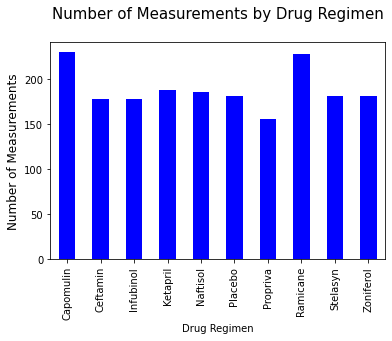

In [19]:
# Created bar plot from dataframe using pandas created above with additional formatting.
drug_regimen_df.plot(kind="bar", color='blue', legend = False)
plt.title('Number of Measurements by Drug Regimen\n', fontsize = 15)
plt.ylabel('Number of Measurements', fontsize = 12)
plt.savefig('images/barpandas')
plt.show()


#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

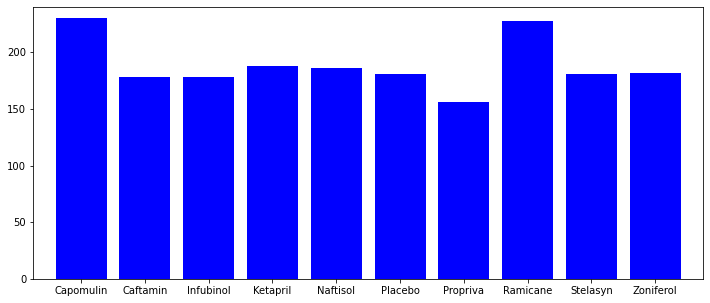

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen_dp = mouse_clean.groupby(['Drug Regimen']).count()['Mouse ID']
drug_regimen_dp

x_axis = np.arange(len(drug_regimen_dp))
drug_regimen_name = ['Capomulin',
                    'Caftamin',
                    'Infubinol',
                    'Ketapril',
                    'Naftisol',
                    'Placebo',
                    'Propriva',
                    'Ramicane',
                    'Stelasyn',
                    'Zoniferol']

plt.figure(figsize=(12,5))
plt.bar(x_axis, drug_regimen_dp, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen_name)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_dp)+10.0)

plt.savefig('images/barpyplt')

#drug_regimen_py.bar()

## Pie Plots

<b>Generate a pie plot showing the distribution of female versus male mice using pandas</b>

In [21]:
mouse_by_gender = mouse_metadata.groupby('Sex').count()
mouse_by_gender

#genderpie = mouse_metadata.groupby('Sex').count()
#genderpie.head()
#testsex = mouse_clean.('Mouse ID').unique()
#testsex.head

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [22]:
test_gender = mouse_clean.groupby(['Mouse ID', 'Sex'])
#test_gender.head()

test_gender_two_df = pd.DataFrame(test_gender.size())
test_gender_two_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [23]:
# Grouping together each sex of mice with counts of both
mouse_gender_df = pd.DataFrame(test_gender_two_df.groupby(['Sex']).count())

# Renaming column to usable data
mouse_gender_df.columns = ['Count']

mouse_gender_df

,Count
Sex,
Female,124
Male,125


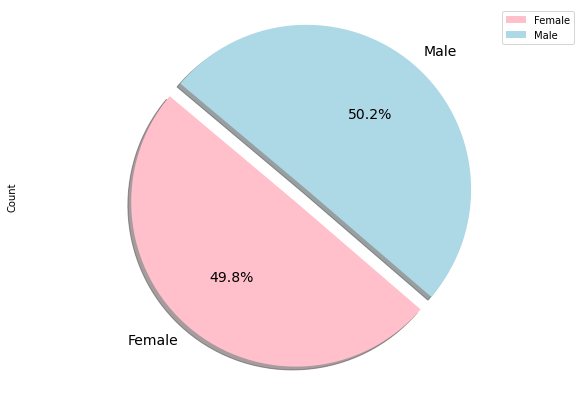

In [24]:
# Creating pie plot using pandas dataframe
colors = ['pink', 'lightblue']
explode = (0.1, 0)

plot = mouse_gender_df.plot.pie(y='Count', explode=explode, colors=colors,
       autopct='%1.1f%%', figsize=(10,7), shadow=True, fontsize=14, startangle=140)

plt.axis('equal')
plt.savefig('images/piepandas')

#### Generate a pie plot showing the distribution of female versus male mice using pyplot

In [25]:
mouse_by_gender = mouse_metadata.groupby('Sex').count()
mouse_by_gender = mouse_by_gender.rename(columns={"Mouse ID": "Count"})
mouse_by_gender

#genderpie = mouse_metadata.groupby('Sex').count()
#genderpie.head()
#testsex = mouse_clean.('Mouse ID').unique()
#testsex.head

,Count,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


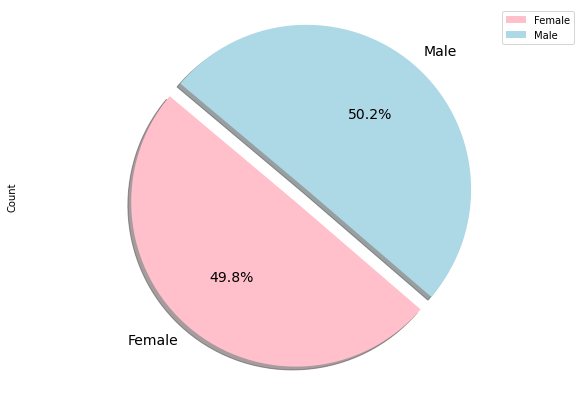

In [26]:
# Creating pie plot using pyplot
colors = ['pink', 'lightblue']
explode = (0.1, 0)

mouse_by_gender.plot(kind='pie', y = 'Count', explode=explode, colors=colors,
       autopct='%1.1f%%', figsize=(10,7), shadow=True, fontsize=14, startangle=140)

plt.axis('equal')
plt.savefig('images/piepyplot')

## Quartiles, Outliers and Boxplots

<b>Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin</b>

In [27]:
# Seperating the four requested drug regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumors_df = mouse_clean.loc[mouse_clean['Drug Regimen'].isin(regimens)]

tumors_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


<b>Start by getting the last (greatest) timepoint for each mouse<b>

In [28]:
tumors_last = tumors_df.groupby('Mouse ID').max()['Timepoint']
tumors_last_df = pd.DataFrame(tumors_last)
tumors_last_df

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


<b>Merge this group df with the original dataframe to get the tumor volume at the last timepoint</b>

In [29]:
tumors_last_merge = pd.merge(tumors_last_df, mouse_clean, on=('Mouse ID', 'Timepoint'), 
                                how='left')
tumors_last_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


<b>NOTE: This is extra information that may or may not be used down the road - went down the wrong road here.</b>

In [30]:
# Start by getting the last (greatest) timepoint for each mouse
#capomulin_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin',:]
#capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
#capomulin_last_df = pd.DataFrame(capomulin_last)

#capomulin_last_df.head()

In [31]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#capomulin_last_df = pd.DataFrame(capomulin_last)
#capomulin_last_merge = pd.merge(capomulin_last_df, mouse_clean, on=('Mouse ID', 'Timepoint'), 
                                #how='left')
#capomulin_last_merge.head()

<b>Calculate the IQR and quantitatively determine if there are any potential outliers.</b>

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


In [33]:
# Creating for loop to list quartiles, IQR and potential outliers
for regimen in regimens:
    tumor_vol_by_regimen = tumors_last_merge['Tumor Volume (mm3)'].loc[tumors_last_merge
                                                                      ['Drug Regimen'] == regimen]
    tumor_vol.append(tumor_vol_by_regimen)
    quartiles = tumor_vol_by_regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {regimen} is: {lowerq}")
    print(f"The upper quartile of {regimen} is: {upperq}")
    print(f"The interquartile range of {regimen} is: {iqr}")
    print(f"The the median of {regimen} is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interqu

<b>Generate a box plot of the final tumor volume of each mouse across four regimens of interest</b>

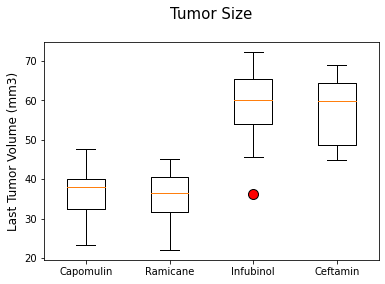

<Figure size 432x288 with 0 Axes>

In [34]:
# Creating box plot with additional formatting

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size\n', fontsize = 15)
ax1.set_ylabel('Last Tumor Volume (mm3)', fontsize = 12)
flierprops = dict(markerfacecolor='r', markersize=10)
ax1.boxplot(tumor_vol, labels=regimens, flierprops=flierprops)

plt.show()
plt.savefig('images/boxplot')

## Line and Scatter Plots

<b>Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.<b>

In [35]:
# Grouping all mice using Capolin data
capomulin_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == 'Capomulin',:]
#capomulin_df.head(50)

# Choosing mouse x401 for my example
mouse_example = capomulin_df.loc[capomulin_df['Mouse ID'] == 'x401',:]
mouse_example

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


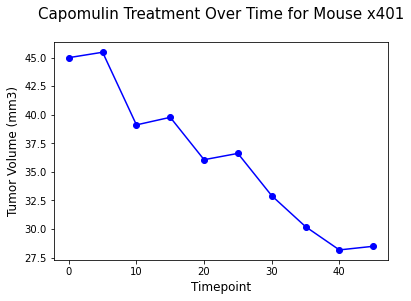

<Figure size 432x288 with 0 Axes>

In [36]:
#Setting x_axis and y_axis from previous data
x_axis_time = mouse_example['Timepoint']
y_tumor_vol = mouse_example['Tumor Volume (mm3)']

#Creating line plot with additional formatting
plt.title('Capomulin Treatment Over Time for Mouse x401\n', fontsize = 15)
plt.plot(x_axis_time, y_tumor_vol, color='blue', marker='o')
plt.xlabel('Timepoint', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.show()
plt.savefig('images/capomulinline')

<b>Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen</b>

In [37]:
# Using previous Capomulin data, take averages of Mouse weight and Tumor Volume
# NOTE: Mouse weight did not change during treatment.

#capomulin_df.head(50)

capomulin_mean = capomulin_df.groupby(['Mouse ID']).mean()
capomulin_mean

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<function matplotlib.pyplot.show>

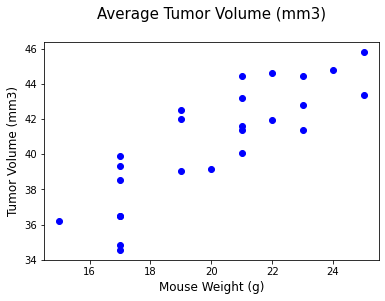

In [40]:
# Creating scatter plot with additional formatting

plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'], color = 'blue')
plt.title('Average Tumor Volume (mm3)\n', fontsize = 15)
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)

plt.show


## Correlation and Regression

<b>Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen</b>

In [41]:
# Calculate the correlation coefficient between mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,1]
tumor_vol = capomulin_mean.iloc[:,3]
correlation = st.pearsonr(mouse_weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708717


<function matplotlib.pyplot.show>

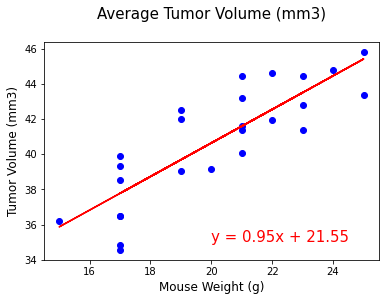

In [42]:
#Adding the linear regression equation and line to the scatter plot.
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'], color = 'blue')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title('Average Tumor Volume (mm3)\n', fontsize = 15)
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.show